In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab임시폴더/mnist/train.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


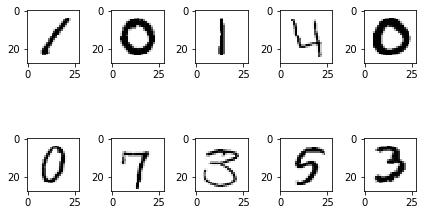

In [18]:
# 결측치와 이상치는 존재하지 않는다!
# 이미지를 확인해보자!
img_data = df.drop('label', axis=1, inplace=False).values

figure = plt.figure()
ax_arr = []

for n in range(10):
    ax_arr.append(figure.add_subplot(2,5,n+1))
    ax_arr[n].imshow(img_data[n].reshape(28,28),   # 이미지 보기, 2차원으로 변경
                     cmap='Greys',                 # 흑백처리
                     interpolation='nearest')      # 해상도 보정
    
plt.tight_layout()
plt.show()

In [19]:
# 데이터를 분할해보자!
# train 데이터와 validation 데이터로 분할해보자!
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,    # train, test 비율
                 random_state=1,   # random seed
                 stratify=df['label'])   # 데이터의 편향 기준

# 정규화도 진행한다! => train_x_data, test_x_data에 대해서만 진행
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# one-hot encoding 처리할 필요가 없다!(sparse 이용)

In [20]:
# Tensorflow 2.x 구현

model = Sequential()

model.add(Flatten(input_shape=(784,)))

model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',   # monitoring할 값.
                   min_delta=0.0001,       # threshold(loss 값을 보고 적절한 값을 설정)
                   patience=5,           # 참는 횟수.
                   mode='auto',
                   restore_best_weights=True)

model.fit(norm_train_x_data,
          train_t_data,
          epochs=5000,
          batch_size=100,
          validation_split=0.3,
          verbose=0,
          callbacks=[es])

In [21]:
result = model.evaluate(norm_test_x_data, test_t_data)
print(result)
#         loss              accuracy
# [0.1612604558467865, 0.9656349420547485]
# [0.20859256386756897, 0.9420635104179382]   => callback threshold 0.001 적용
# [0.16113924980163574, 0.957460343837738]   => callback threshold 0.0001 적용

394/394 [==============================] - 1s 3ms/step - loss: 0.1611 - accuracy: 0.9575
[0.16113924980163574, 0.957460343837738]
